In [5]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import new_alg_v2 as na2
import matplotlib.pyplot as plt
import math
from torchvision.datasets import MNIST, FashionMNIST
from torchvision import transforms
from tqdm import tqdm
import torch.optim as optim
import statistics
import pickle

torch.set_default_dtype(torch.float64)

In [6]:
with open('dict_SGD_10.pickle', 'rb') as file:
    dict_SGD = pickle.load(file)

In [7]:
dict_SGD["bs1024"]["NN_res"]["NN9"][0]
print(dict_SGD["bs1024"]["avgs"])
print(dict_SGD["bs1024"]["stds"])
print(dict_SGD["bs512"]["avgs"])
print(dict_SGD["bs512"]["stds"])
print(dict_SGD["bs256"]["avgs"])
print(dict_SGD["bs256"]["stds"])
print(dict_SGD["bs128"]["avgs"])
print(dict_SGD["bs128"]["stds"])
print(dict_SGD["bs64"]["avgs"])
print(dict_SGD["bs64"]["stds"])
print(dict_SGD["bs32"]["avgs"])
print(dict_SGD["bs32"]["stds"])


[-0.8374635795147001, -0.077331184165596, 2.3105777021646996, -0.39578293848438995]
[3.633914994401287, 0.9018475109276447, 5.743316400719028, 1.5805936604737805]
[0.2232748266395146, 0.35176733607321087, 0.2830366272516451, 0.14192121003565572]
[0.10817055145196777, 0.5458226208628656, 0.4213139563226057, 0.4644300096312365]
[0.33855458250423226, 0.19870366242561108, 0.22597970978799994, 0.2367620452821521]
[0.4248279883005238, 0.8463682066294345, 0.13870455136602647, 0.45462051713553286]
[0.23429832682769755, 0.20832125687229616, 0.3425450682925445, 0.21483534800747045]
[0.18897873046440725, 0.19128143735884223, 0.20754113247343456, 0.2850404256506961]
[0.3377784682074384, 0.44086586022667973, 0.22636528591695212, -0.005009614351083966]
[0.6474618888926301, 0.5711559361923847, 0.7122872927424415, 0.7687336695207608]
[0.13679132805092925, 0.12629251447919354, 0.4993973736089063, 0.23751878386095693]
[0.29504513659966825, 0.4053944589183267, 0.35358389133806695, 0.3359303862918643]


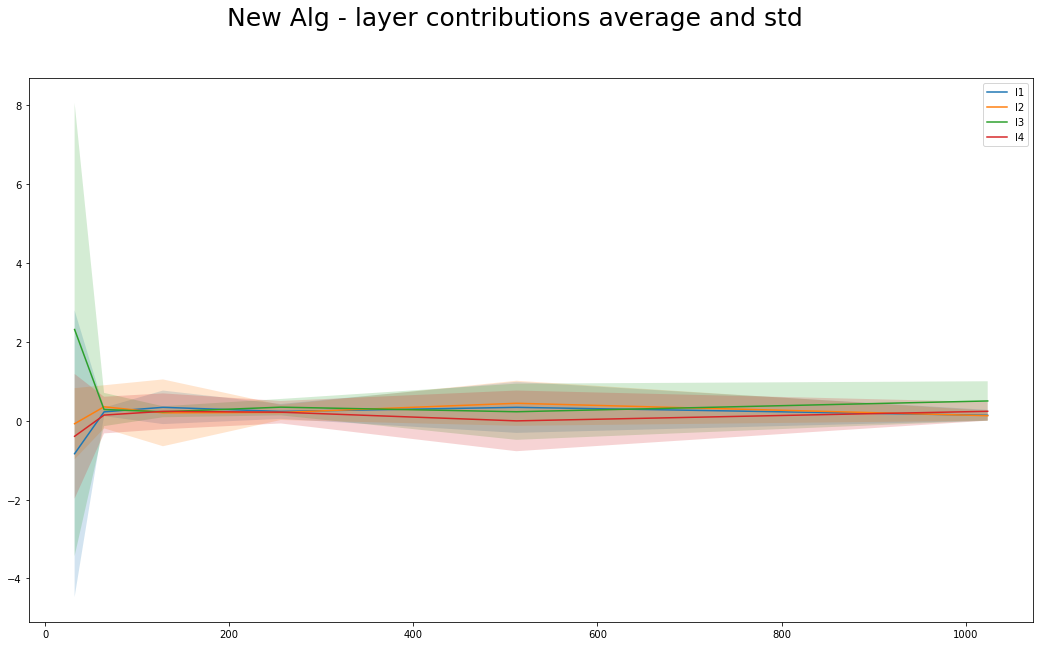

In [8]:
# results
batch_sizes = [32, 64 ,128 ,256 ,512 ,1024]
layer_cont = np.array([dict_SGD["bs1024"]["avgs"], dict_SGD["bs512"]["avgs"], dict_SGD["bs256"]["avgs"], dict_SGD["bs128"]["avgs"], dict_SGD["bs64"]["avgs"], dict_SGD["bs32"]["avgs"]]).T
layer_cont_std = np.array([dict_SGD["bs1024"]["stds"], dict_SGD["bs512"]["stds"], dict_SGD["bs256"]["stds"], dict_SGD["bs128"]["stds"], dict_SGD["bs64"]["stds"], dict_SGD["bs32"]["avgs"]]).T


fig = plt.figure(figsize=(18, 10))

fig.suptitle('New Alg - layer contributions average and std', fontsize=25)
for i in range(4):
    plt.plot(batch_sizes,layer_cont[i,:])
    plt.fill_between(batch_sizes, layer_cont[i,:]-layer_cont_std[i,:], layer_cont[i,:]+layer_cont_std[i,:], alpha=0.2)    
plt.legend(['l1', 'l2', 'l3', 'l4'])

In [9]:
def plot_res(train_loss, train_accuracy, batch_size, alg, nn_number):
    fig = plt.figure(figsize=(18, 5))
    if alg == 'NA':
        title = 'New Alg, batch size ' + str(batch_size) + ", NN number " + str(nn_number)
    elif alg == 'GD':
        title = 'GD, batch size ' + str(batch_size)
    elif alg == 'ADAM':
        title = 'Adam, batch size ' + str(batch_size)
    fig.suptitle(title, fontsize=25)


    x = list(range(len(train_loss)))
    ax = fig.add_subplot(1,2,1)
    plt.plot(x,train_loss)
    ax.set_title('loss vs training steps', fontsize=15)

    x = list(range(len(train_accuracy)))
    ax = fig.add_subplot(1,2,2)
    plt.plot(x,train_accuracy)
    ax.set_title('accuracy vs training steps', fontsize=15)

    plt.tight_layout()

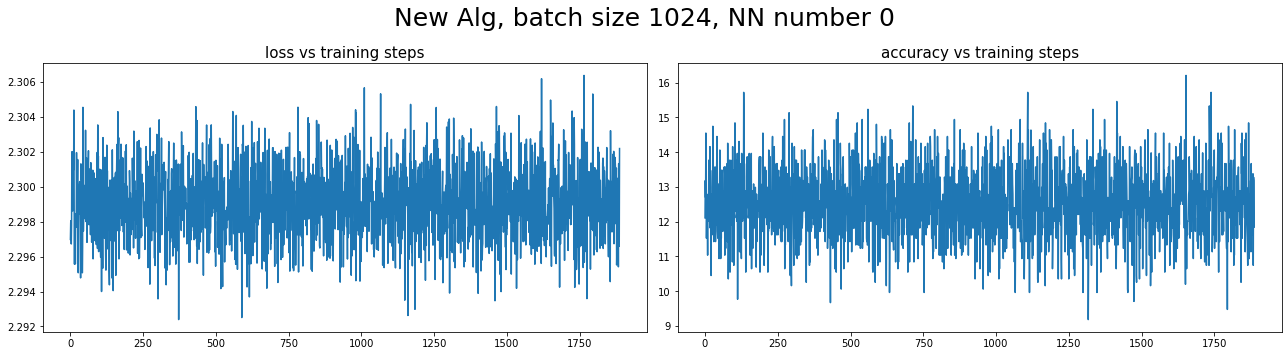

In [10]:
res = dict_SGD["bs1024"]["NN_res"]["NN0"]
batch_size = 1024
alg = 'NA'
plot_res(res[0], res[1], batch_size, alg, 0)

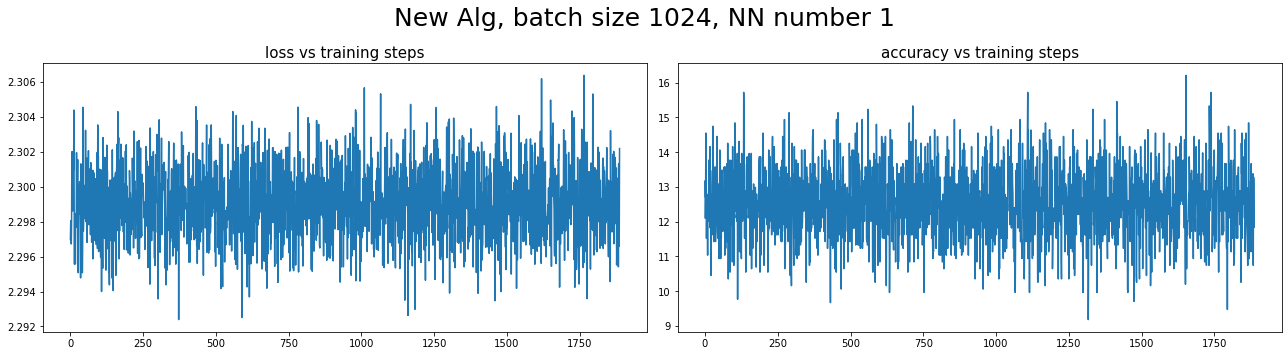

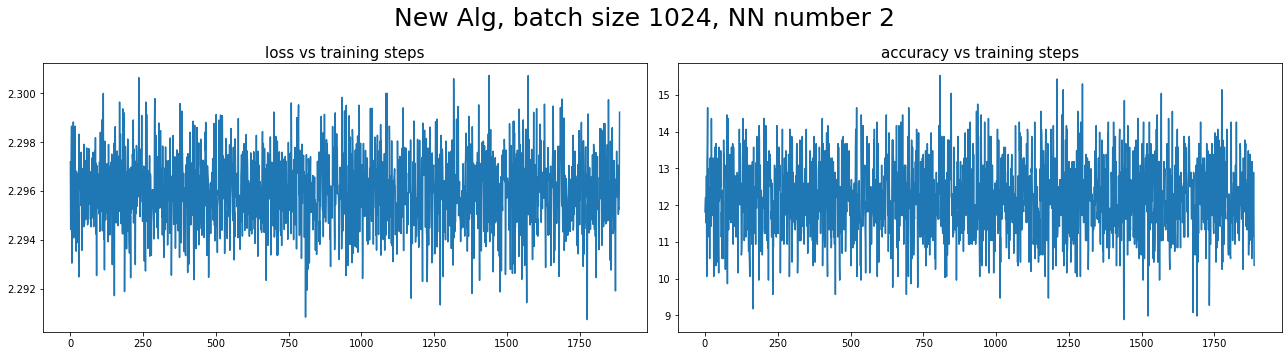

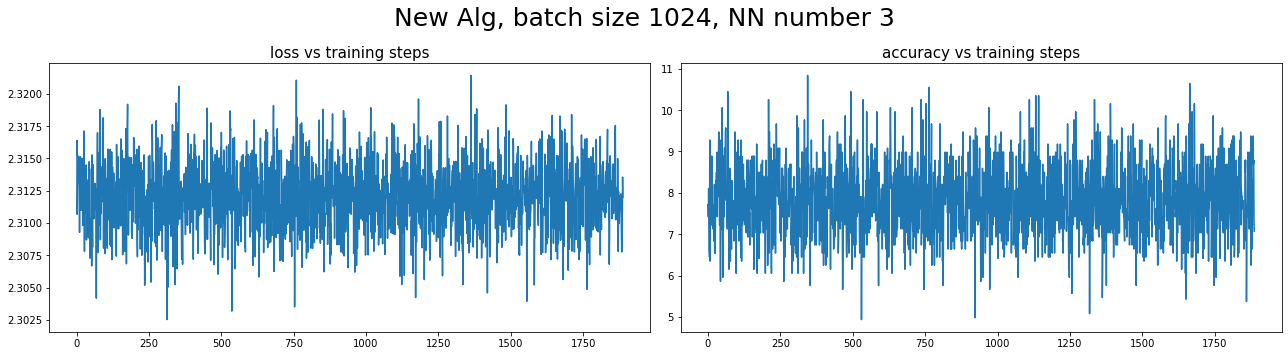

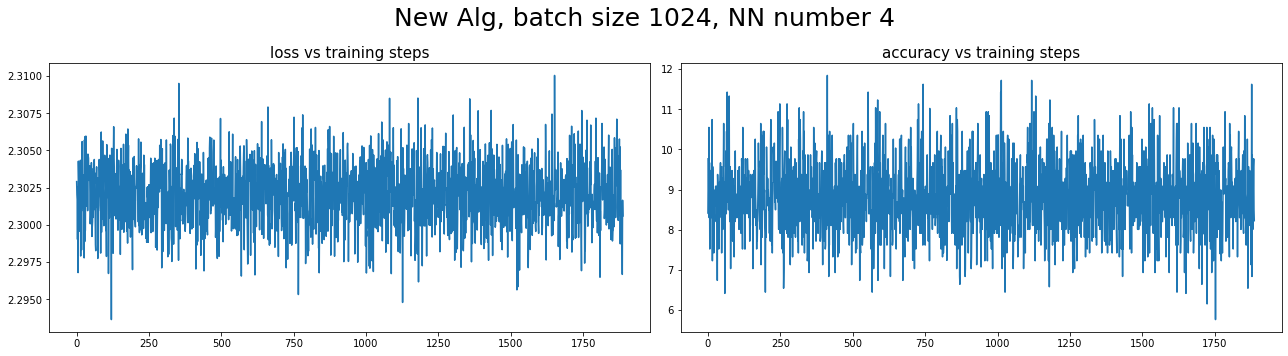

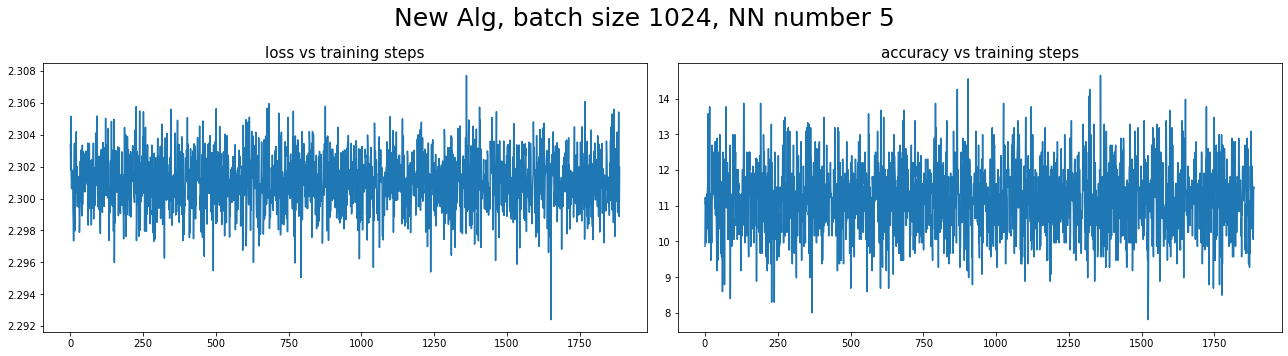

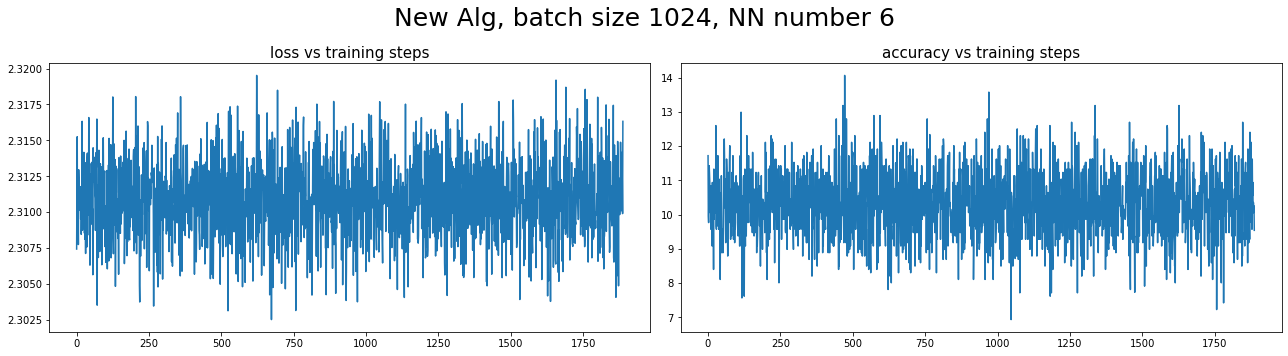

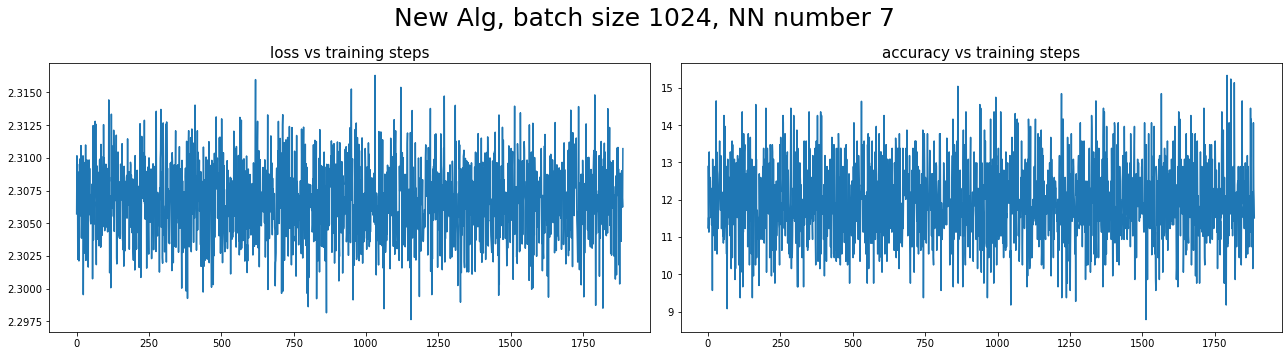

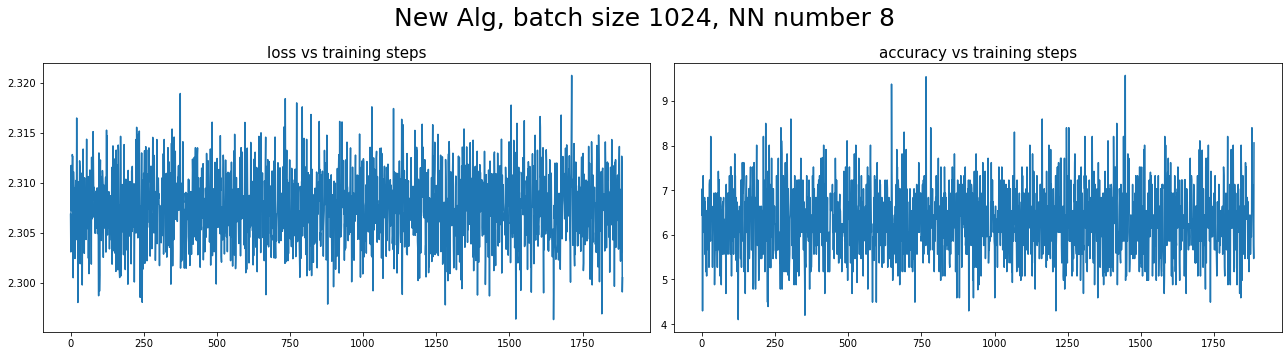

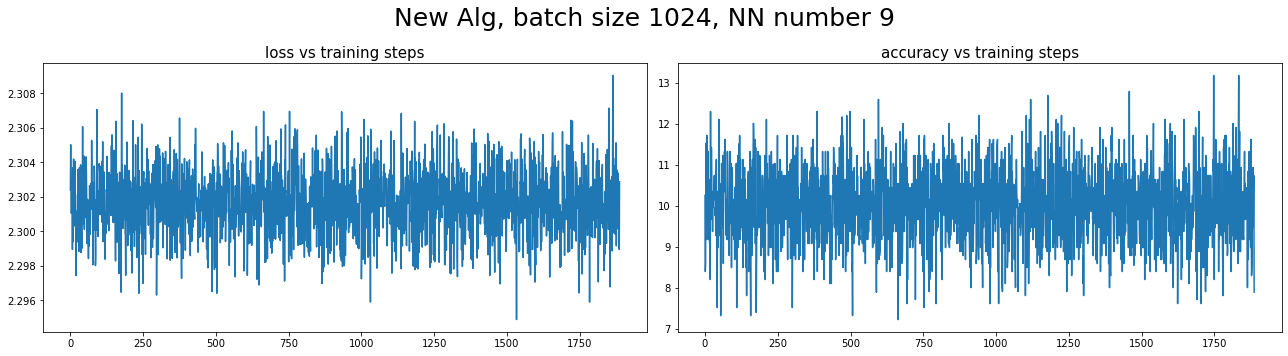

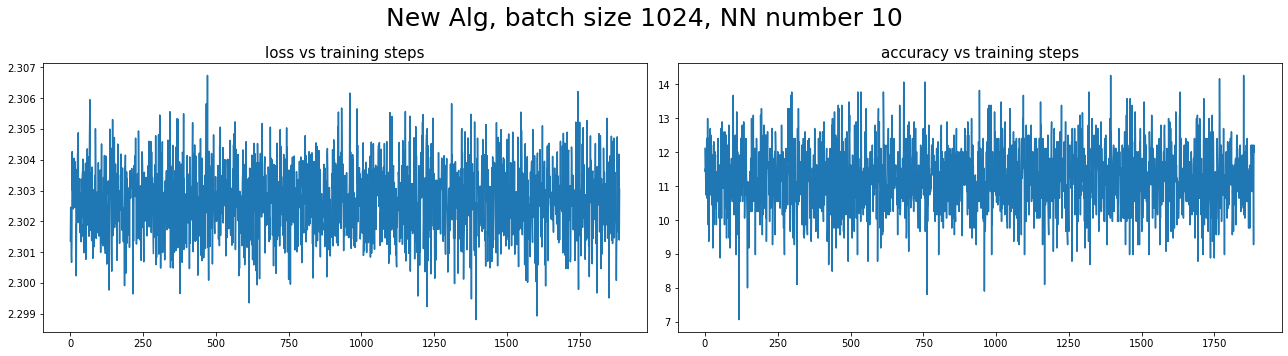

In [12]:
batch_size = 1024
nets = np.arange(0,10) # from 0 to 99
alg = 'NA'

for i in nets:
    nn_number = "NN" + str(i)
    bs_str = "bs" + str(batch_size)
    res = dict_SGD[bs_str]["NN_res"][nn_number]
    plot_res(res[0], res[1], batch_size, alg, i+1)